In [2]:

import os
import pandas as pd
import requests
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [3]:
load_dotenv()

True

In [4]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [5]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [6]:
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

                       

In [7]:
today = pd.Timestamp("2020--03-24", tz="America/New_York").date()
end = pd.Timestamp("2021-03-24", tz="America/New_York").date()

In [8]:
tickers = ["FB", "PLTR"]
from alpaca_trade_api.rest import REST, TimeFrame

In [33]:
yearly = alpaca.get_bars(
    tickers,
    TimeFrame.Day,
    start = today,
    end = end,
    limit=1000
).df
yearly
    

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-03-24 04:00:00+00:00,154.94,161.310,152.5700,160.98,30464098,262572,157.681498,FB
2020-03-25 04:00:00+00:00,158.67,162.990,153.0600,156.21,35192340,347648,157.757354,FB
2020-03-26 04:00:00+00:00,158.63,164.000,157.0201,163.34,26579221,247568,160.695738,FB
2020-03-27 04:00:00+00:00,158.56,160.090,154.7500,156.79,24879869,220200,156.665785,FB
2020-03-30 04:00:00+00:00,159.18,166.750,158.0600,165.95,22515989,229390,163.232090,FB
...,...,...,...,...,...,...,...,...
2021-03-18 04:00:00+00:00,24.72,25.180,23.7800,23.98,57523401,346523,24.553333,PLTR
2021-03-19 04:00:00+00:00,24.01,24.570,23.3900,24.32,57952707,273001,24.177720,PLTR
2021-03-22 04:00:00+00:00,24.90,24.920,23.8600,24.22,46208317,252955,24.308368,PLTR


In [34]:
yearly.index = yearly.index.date
yearly = yearly[["close", "symbol"]]

In [38]:
tables = pd.pivot_table(yearly, values='close', index=yearly.index, columns=["symbol"])
tables

symbol,FB,PLTR
2020-03-24,160.98,NaN
2020-03-25,156.21,NaN
2020-03-26,163.34,NaN
2020-03-27,156.79,NaN
2020-03-30,165.95,NaN
...,...,...
2021-03-18,278.62,23.98
2021-03-19,290.11,24.32
2021-03-22,293.54,24.22
2021-03-23,290.63,23.26


In [39]:
daily_returns = tables.pct_change().dropna()
daily_returns

symbol,FB,PLTR
2020-10-01,0.018060,-0.004211
2020-10-02,-0.025091,-0.027484
2020-10-05,0.018120,-0.018478
2020-10-06,-0.022634,0.096346
2020-10-07,-0.002088,0.010101
...,...,...
2021-03-18,-0.018978,-0.048790
2021-03-19,0.041239,0.014178
2021-03-22,0.011823,-0.004112
2021-03-23,-0.009913,-0.039637


<AxesSubplot:title={'center':'Pltr and Facebook'}>

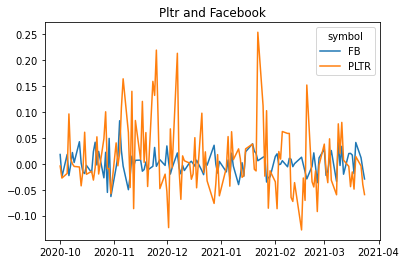

In [40]:
daily_returns.plot(title="Pltr and Facebook")